# Set Initial Data from ADM Variables

In [1]:
Needs["xAct`xCoba`", FileNameJoin[{Environment["GENERATO"], "src/Generato.wl"}]]

------------------------------------------------------------
Package xAct`xPerm`  version 1.2.3, {2015, 8, 23}
CopyRight (C) 2003-2020, Jose M. Martin-Garcia, under the General Public\
 
>   License.
Connecting to external mac executable...
Connection established.
------------------------------------------------------------
Package xAct`xTensor`  version 1.2.0, {2021, 10, 17}
CopyRight (C) 2002-2021, Jose M. Martin-Garcia, under the General Public\
 
>   License.
------------------------------------------------------------
These packages come with ABSOLUTELY NO WARRANTY; for details type\
 
>   Disclaimer[]. This is free software, and you are welcome to redistribute\
 
>   it under certain conditions. See the General Public License for details.
------------------------------------------------------------
------------------------------------------------------------
Package xAct`xCoba`  version 0.8.6, {2021, 2, 28}
CopyRight (C) 2005-2021, David Yllanes and Jose M. Martin-Garcia, under t

In [2]:
DefManifold[M4, 4, IndexRange[a, z]];

In [3]:
<<"wl/cGHG_vars_check.wl";
<<"wl/ADM_vars_check.wl";
<<"wl/cGHGinADM_rhs.wl";

In [6]:
rhsof[var_] := Module[{}, var /. {var[[0]] :> RHSOf[ToString[var[[0]]]]}];
eqssof[varlist_] := Module[{var}, 
   Table[var = varlist[[ivar]][[1]]; var == rhsof[var]//ScreenDollarIndices, {ivar, 1, Length[varlist]}]];

## Input

$$
\begin{align*}
&{\alpha, \beta^i, \gamma_{ij}, K_{ij},}\\
&{\partial_t\alpha, \partial_t\beta^i, \partial_t\gamma_{ij}.}\\
&{\partial_k\alpha, \partial_k\beta^i, \partial_k\gamma_{ij}.}
\end{align*}
$$

$$
\begin{align*}
{\partial_k\hat{H}_\mathbf{n}, \partial_k\hat{H}_l}
\end{align*}
$$

## Intermediate

$$
\begin{align*}
\gamma
&=\det\left(\gamma_{ij}\right),
\\
\gamma^{ij}
&=\left(\gamma_{ij}\right)^{-1},
\\
K
&=\gamma^{ij}K_{ij},
\\
n^c
&=\left(\alpha^{-1},-\alpha^{-1}\beta^i\right)
\end{align*}
$$

-Image-
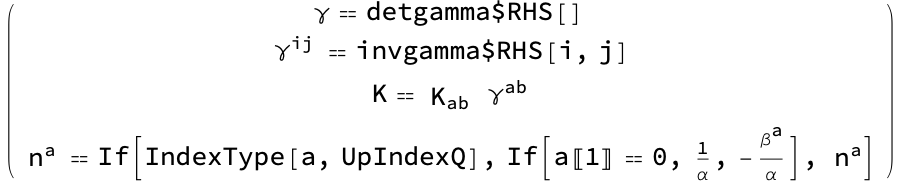

In [8]:
Rasterize[eqssof[ADMTempVarlist][[1;;4]]//MatrixForm]

## Set $\partial_t\alpha, \partial_t\beta^i, \partial_t\gamma_{ij}$

### $\partial_t\gamma_{ij}
=-2\alpha K_{ij}+2D_{(i}\beta_{j)}
=-2\alpha K_{ij}+2\partial_{(i}g_{j)0}-\beta^k\left(2\partial_{(i}g_{j)k}-\partial_kg_{ij}\right),
$

### $\partial_t\alpha,\partial_t\beta^i$

$$
\begin{align*}
{}^{(3)}\hat\Gamma^i
&=\gamma^{1/3}
\left(
    \gamma^{ik}\gamma^{jl}-\frac{1}{3}\gamma^{ij}\gamma^{kl}
\right)\partial_j\gamma_{kl}
\\
{\partial_t\alpha}
&=\beta^k\partial_k\alpha - 2\alpha K,
\\
{\partial_t\beta^i}
&=\beta^k\partial_k\beta^i+\nu^{(3)}\hat\Gamma^i-\eta\beta^i.
\end{align*}
$$

## Set $\partial_cg_{ab}$

$$
\begin{align*}
\partial_cg_{ij}
&=\partial_c\gamma_{ij},
\\
\partial_cg_{0j}
&=\beta^l\partial_c\gamma_{jl}+\gamma_{jl}\partial_c\beta^l,
\\
\partial_cg_{00}
&=-2\alpha\partial_c\alpha+2\beta_l\partial_c\beta^l+\beta^i\beta^j\partial_c\gamma_{ij},
%\\
%\partial_tg_{ij}
%&
%=\partial_t\gamma_{ij}
%\\
%\partial_tg_{0j}
%&=\beta^k\partial_tg_{jk}+\gamma_{jk}\textcolor{red}{\partial_t\beta^k},
%\\
%\partial_tg_{00}
%&=-2\alpha\textcolor{red}{\partial_t\alpha}
%+2\beta_l\textcolor{red}{\partial_t\beta^l}+\beta^i\beta^j\partial_tg_{ij},
\end{align*}
$$

since
$
2\Gamma^k{}_{ij}\beta_k
=\gamma^{kl}
\left(\partial_i\gamma_{jl}+\partial_j\gamma_{li}-\partial_l\gamma_{ij}\right)\beta_k
$

## Set $g^{ab}, \Gamma_{cab}, \Gamma_c$

$$
\begin{align*}
g^{ab}
&=\gamma^{ab} - n^an^b
%&=
%\begin{pmatrix}
%-\alpha^{-2} & \alpha^{-2}\beta^i \\
%\alpha^{-2}\beta^j & \gamma^{ij}-\alpha^{-2}\beta^i\beta^j
%\end{pmatrix}
\\
\Gamma_{cab}
&=\frac{1}{2}
\left(
  \partial_ag_{bc}+\partial_bg_{ca}-\partial_cg_{ab}
\right),
\\
\Gamma_c
&=g^{ab}\Gamma_{cab},
\end{align*}
$$

## Set cGHG Variables

$$
\begin{align*}
W
&=\gamma^{-1/6},
\\
\varPi
&=-\alpha\partial_\mathbf{n}W=\frac{1}{6}\alpha W\gamma^{kl}\partial_\mathbf{n}\gamma_{kl},
\\
\varPhi_i
&=\alpha\partial_iW=-\frac{1}{6}\alpha W\gamma^{kl}\partial_i\gamma_{kl}.
\end{align*}
$$

$$
\begin{align*}
\hat{g}_\mathbf{nn}
&=-2\alpha,
\\
\hat{g}_\mathbf{n}{}^i
&=\beta^i,
\\
\hat{g}_{ij}
&=W^2\gamma_{ij}.
\end{align*}
$$

$$
\begin{align*}
\hat\Pi_\mathbf{nn}
&=-\alpha^2\partial_\mathbf{n}g_\mathbf{nn},
\\
\hat\Pi_\mathbf{n}{}^i
&=-\alpha^2\gamma^{ij}\partial_\mathbf{n}g_{\mathbf{n}j},
\\
\hat\Pi_{ij}
&=-\alpha W^2\partial_\mathbf{n}g_{ij}+2W \varPi\gamma_{ij},
\end{align*}
$$

$$
\begin{align*}
\hat\Phi_{k\mathbf{nn}}
&=\alpha^2\partial_kg_\mathbf{nn},
\\
\hat\Phi_{k\mathbf{n}}{}^i
&=\alpha^2\gamma^{ij}\partial_kg_{\mathbf{n}j},
\\
\hat\Phi_{kij}
&=\alpha W^2\partial_kg_{ij}+2W\varPhi_k\gamma_{ij}.
\end{align*}
$$

$$
\begin{align*}
\hat{H}_\mathbf{n}
&=-\alpha\Gamma_\mathbf{n},
\\
\hat{H}_i
&=-\alpha^2W^2\Gamma_i.
\end{align*}
$$

$$
\begin{align*}
\hat\theta_\mathbf{n}
&=-\beta^k\partial_k\hat{H}_\mathbf{n},
\\
\hat\theta_i
&=-\beta^k\partial_k\hat{H}_i.
\end{align*}
$$